In [16]:
import os
import cv2
import random
import math
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET')

all_classes = os.listdir('/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET')
print (all_classes)  
len(all_classes)

['sugar', 'cup', 'sweet', 'ac', 'bill', 'thank-you', 'water', 'no', 'vegetables', 'pop corn', 'bitter', 'milk', 'allergy', 'spicy', 'cost', 'ice cream', 'chair', 'cheese', 'napkin', 'about', 'small', 'french fries', 'manager', 'salt', 'cold', 'warm', 'ingredients', 'burger', 'alcohol', 'eggs', 'chicken', 'what', 'bread', 'hello', 'sauce', 'bag', 'pizza', 'pepper', 'drink', 'which', 'gluten free']


41

In [18]:
plt.figure(figsize=(20,20))
random_range=random.sample(range(len(all_classes)),22)
for counter,random_index in enumerate(random_range,1):
  selected_Class=all_classes[random_index]
  video_files_names_list=os.listdir(f'/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET/{selected_Class}')
  selected_video_file_name=random.choice(video_files_names_list)
  video_reader=cv2.VideoCapture(f'/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET/{selected_Class}/{selected_video_file_name}')
  _,bgr_frame=video_reader.read()
  rgb_frame=cv2.cvtColor(bgr_frame,cv2.COLOR_BGR2RGB)
  cv2.putText(rgb_frame,selected_Class,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
  plt.subplot(11,2,counter);plt.imshow(rgb_frame);plt.axis('off')

In [19]:
IMAGE_HEIGHT,IMAGE_WIDTH=128,128
SEQUENCE_LENGTH=10
DATASET='/Users/vedantpadole/Desktop/Research/ASL_MY_DATASET'
CLASSES_LIST=all_classes

In [20]:
def frames_extraction(video_path):
  frames_list=[]
  video_reader=cv2.VideoCapture(video_path)
  video_frames_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
  skip_frames_window=max(int(video_frames_count/SEQUENCE_LENGTH),1)
  for frame_counter in range(SEQUENCE_LENGTH):
    video_reader.set(cv2.CAP_PROP_POS_FRAMES,frame_counter*skip_frames_window)
    success,frame=video_reader.read()
    if not success:
      break
    resized_frame=cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
    normalized_frame=resized_frame/255
    frames_list.append(normalized_frame)
  video_reader.release()
  return frames_list

In [21]:
def create_dataset():
  features=[]
  labels=[]
  video_files_path=[]
  for class_index,class_name in enumerate(CLASSES_LIST):
    print(f'Extracting the data of class:  {class_name}')
    files_list=os.listdir(os.path.join(DATASET,class_name))
    for file_name in files_list:
      video_file_path=os.path.join(DATASET,class_name,file_name)
      frames=frames_extraction(video_file_path)
      if len(frames)==SEQUENCE_LENGTH:
        features.append(frames)
        labels.append(class_index)
        video_files_path.append(video_file_path)
  features=np.asarray(features)
  labels=np.array(labels)
  return features,labels,video_files_path

In [22]:
features,labels,video_files_path=create_dataset()

Extracting the data of class:  sugar
Extracting the data of class:  cup
Extracting the data of class:  sweet
Extracting the data of class:  ac
Extracting the data of class:  bill
Extracting the data of class:  thank-you
Extracting the data of class:  water
Extracting the data of class:  no
Extracting the data of class:  vegetables
Extracting the data of class:  pop corn
Extracting the data of class:  bitter
Extracting the data of class:  milk
Extracting the data of class:  allergy
Extracting the data of class:  spicy
Extracting the data of class:  cost
Extracting the data of class:  ice cream
Extracting the data of class:  chair
Extracting the data of class:  cheese
Extracting the data of class:  napkin
Extracting the data of class:  about
Extracting the data of class:  small
Extracting the data of class:  french fries
Extracting the data of class:  manager
Extracting the data of class:  salt
Extracting the data of class:  cold
Extracting the data of class:  warm
Extracting the data of

In [23]:
from keras.utils import to_categorical
one_hot_encoded_labels=to_categorical(labels)

In [24]:
seed_constant=27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [27]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,one_hot_encoded_labels,test_size=0.2,shuffle=True,random_state=seed_constant)

In [29]:
a=features_train.shape[0]

In [30]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,TimeDistributed,Dropout,Flatten,Dense,LSTM
model=Sequential()
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))
model.add(TimeDistributed(Conv2D(256, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(CLASSES_LIST), activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 10, 126, 126, 32)  896      
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 10, 63, 63, 32)   0         
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 10, 63, 63, 32)   0         
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 10, 61, 61, 64)   18496     
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 10, 30, 30, 64)  

In [32]:
from keras.callbacks import EarlyStopping
early_stopping_call=EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
r=model.fit(x=features_train,y=labels_train,epochs=50,batch_size=32,shuffle=True,validation_split=0.2,callbacks=[early_stopping_call])

Epoch 1/50
25/25 [==============================] - 248s 9s/step - loss: 3.7460 - accuracy: 0.0279 - val_loss: 3.7105 - val_accuracy: 0.0707
Epoch 2/50
25/25 [==============================] - 253s 10s/step - loss: 3.6599 - accuracy: 0.0406 - val_loss: 3.6197 - val_accuracy: 0.0455
Epoch 3/50
25/25 [==============================] - 205s 8s/step - loss: 3.4778 - accuracy: 0.1001 - val_loss: 3.4479 - val_accuracy: 0.0960
Epoch 4/50
25/25 [==============================] - 209s 8s/step - loss: 3.2833 - accuracy: 0.1394 - val_loss: 3.1925 - val_accuracy: 0.1515
Epoch 5/50
25/25 [==============================] - 226s 9s/step - loss: 2.9292 - accuracy: 0.2003 - val_loss: 2.8150 - val_accuracy: 0.2879
Epoch 6/50
25/25 [==============================] - 199s 8s/step - loss: 2.7227 - accuracy: 0.2548 - val_loss: 2.4242 - val_accuracy: 0.3384
Epoch 7/50
25/25 [==============================] - 185s 7s/step - loss: 2.3567 - accuracy: 0.3397 - val_loss: 2.5590 - val_accuracy: 0.3030
Epoch 8/50
2

In [33]:
model.save("LRCN_small_model.h5")

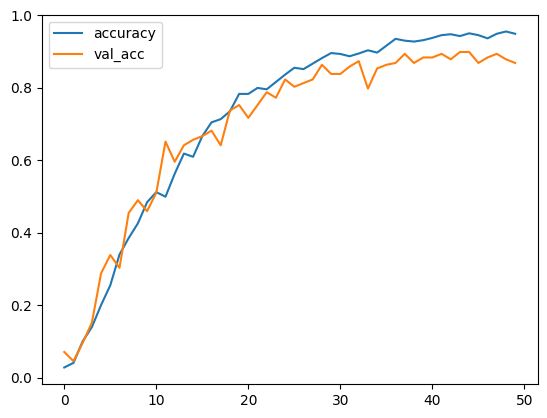

In [37]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

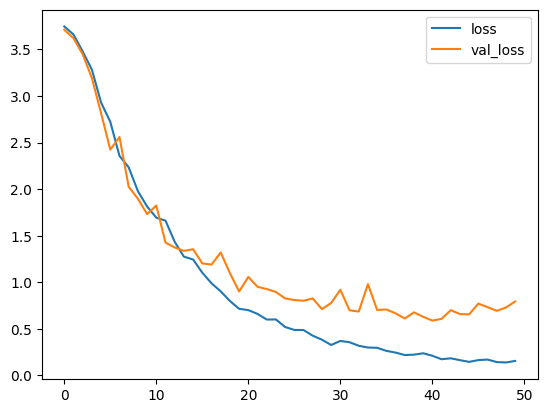

In [36]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [38]:
history=model.evaluate(features_test,labels_test)

8/8 [==============================] - 17s 2s/step - loss: 0.6499 - accuracy: 0.8988
